<p style="text-align:center;">
2/1/2026
</p>

**Báo cáo đồ án: PYTHON CHO KHOA HỌC DỮ LIỆU**

**Lớp 23TTH Khoa Toán - Tin học**

**Đề tài: XÂY DỰNG MÔ HÌNH GIAN LẬN THẺ TÍN DỤNG**

<div style="text-align: center;">
  <img src="https://media.licdn.com/dms/image/C4D12AQE9UYEAdxvJOg/article-cover_image-shrink_600_2000/0/1632034924338?e=2147483647&v=beta&t=iIE0l0sJh4MfpuOefnpW--v_obcDlUajVkxvYLOabb4" width="500" alt="Giao dịch thẻ tín dụng" />
</div>

**Giảng viên bộ môn: ThS. Hà Văn Thảo**

**Thành viên nhóm:**
* Nguyễn Võ Đăng Khoa - 23110092
* Nguyễn Nhất Khôi - 23110094
* Nguyễn Quang Kiệt - 23110096


# **1. CÁC BƯỚC CHUẨN BỊ**

## **1.1 KHAI BÁO THƯ VIỆN CẦN THIẾT VÀ NẠP DỮ LIỆU**

In [1]:
# --- 1. Core & Data Manipulation ---
import pandas as pd
import numpy as np
import os
import joblib
from collections import Counter

# --- 2. Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- 3. Preprocessing & Model Selection ---
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# --- 4. Models ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# --- 5. Imbalanced Learning (Sampling & Pipeline) ---
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# --- 6. Metrics & Evaluation ---
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

np.set_printoptions(precision=8, suppress=True)

**Tiến hành các bước đọc file và phân tích file**

In [2]:
#Đọc file
df = pd.read_csv('creditcard.csv')

## **1.2 TỔNG QUAN VỀ BỘ DỮ LIỆU**

**In ra thông tin tổng quát bộ dữ liệu**

In [3]:
#in ra thông tin dữ liệu
print(">>>> THÔNG TIN DỮ LIỆU <<<<\n")
df.info()

>>>> THÔNG TIN DỮ LIỆU <<<<

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-

Bộ dữ liệu này chứa các giao dịch thẻ tín dụng được thực hiện vào **tháng 9 năm 2013** bởi chủ thẻ tại châu Âu. Dữ liệu ghi nhận các giao dịch xảy ra trong **hai ngày**, với **492 giao dịch gian lận trên tổng số 284.807 giao dịch**. **Đây là một bộ dữ liệu rất mất cân bằng, trong đó lớp dương (gian lận) chỉ chiếm 0,172% tổng số giao dịch.**

Bộ dữ liệu chỉ bao gồm các biến đầu vào dạng số, và các biến này là kết quả của phép biến đổi PCA (Principal Component Analysis) - Một kỹ thuật giảm chiều dữ liệu làm cho V1->V28 đã được chuẩn hóa và mang tính bảo mật cao.

*   Các đặc trưng V1, V2, …, V28 là các thành phần chính thu được sau khi áp dụng PCA.

*   Time: số giây đã trôi qua kể từ giao dịch đầu tiên trong bộ dữ liệu.
*   Amount: giá trị của giao dịch; đặc trưng này có thể được sử dụng trong các bài toán học nhạy chi phí (cost-sensitive learning) phụ thuộc vào từng mẫu.
*   Class là biến mục tiêu, nhận giá trị 1 nếu giao dịch là gian lận, và 0 nếu không phải gian lận.

**Bài toán đặt ra: Nếu chúng ta bắt sót ca gian lận thì tổn thất khoảng 100 USD, trong khi đó nếu bắt nhầm giao dịch bình thường thì chi phí tổn thất sẽ ít hơn. Do vậy chúng ta sẽ ưu tiên bắt nhiều trường hợp gian lận nhất có thể.**

**Kích thước dữ liệu**

In [4]:
print('>>>> Kích thước dữ liệu <<<<')
print(f"Data Card Credit Fraud có: {df.shape[0]} hàng, {df.shape[1]} cột.")

>>>> Kích thước dữ liệu <<<<
Data Card Credit Fraud có: 284807 hàng, 31 cột.


**In ra 5 dòng đầu của bộ dữ liệu**

In [5]:
#in ra 5 dòng đầu
print(">>>> 5 DÒNG ĐẦU TIÊN <<<<")
df.head().round(2)

>>>> 5 DÒNG ĐẦU TIÊN <<<<


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.0,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.0,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.0,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


**Kiểm tra giá trị thiếu trong dữ liệu**

In [6]:
print(">>>> KIỂM TRA GIÁ TRỊ TRONG DỮ LIỆU <<<<")
total_null = pd.DataFrame(df.isnull().sum())
total_null

>>>> KIỂM TRA GIÁ TRỊ TRONG DỮ LIỆU <<<<


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Để kiểm tra giá trị thiếu trong dữ liệu ta lần lượt thực hiện hai bước sau:
* Tìm và tính tổng dữ liệu null trong data
* Tính tỉ lệ dữ liệu null trong data

Như vậy từ kết quả trên ta có thể rút ra được dữ liệu hoàn toàn đầy đủ và không có Null, có thể tiếp tục xử lý đến bước tiếp theo

**Thống kê mô tả của bộ dữ liệu**

In [7]:
#Kiểm tra thống kê mô tả
print('>>>> THỐNG KÊ MÔ TẢ <<<<')
df.describe().round(2)

>>>> THỐNG KÊ MÔ TẢ <<<<


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Từ các cột thống kê mô tả ta thấy được:
+ Dữ liệu có **284807 giao dịch** được xảy ra.
+ Dữ liệu của time được tính theo giây tổng có 172792 giây = 2 ngày
+ Giá trị 50% (median) là 84692.00, thấp hơn giá trị trung bình 94813.86, điều này cho thấy rằng phân phối có xu hướng hơi lệch về bên phải, nghĩa là đa số giao dịch có giá trị nhỏ và một số ít giao dịch có giá trị lớn nó kéo mean lên cao.

**Xem sơ bộ lớp Class để xem giao dịch bình thường và giao dịch gian lận**

In [8]:
#ta kiểm tra phân phối của hai mục tiêu cần xác địch là (Non-Fraud và Fraud)
class_count = df['Class'].value_counts()
total = len(df)
class_percent = (class_count / total) * 100

df_class = pd.DataFrame({
                          'Loại Giao Dịch': ['Bình thường (0)','Gian lận (1)'],
                          'Số lượng': class_count,
                          'Tỷ lệ (%)': class_percent.round(2)
                        })
df_class.set_index('Loại Giao Dịch', inplace = True)
df_class.transpose()

Loại Giao Dịch,Bình thường (0),Gian lận (1)
Số lượng,284315.00,492.00
Tỷ lệ (%),99.83,0.17


Từ đây ta rút ra được, trong 284807 giao dịch:
+ Có 284315 giao dịch bình thường -> chiếm tỷ lệ 99,83%
+ Có 492 giao dịch gian lận -> chiếm tỷ lệ 0,17%

 Xem xét được tỉ lệ giữa giao dịch bình thường và so với tổng thể thì có thể dữ liệu bị mất cân bằng nghiêm trọng. Do tỷ lệ giao dịch bình thường so với giao dịch gian lận bị lệch rất nhiều nếu chọn mô hình không chính xác có thể gây ra sai sót. Đặc biệt là ảnh hưởng tới chỉ số accuracy làm cho chúng ta thấy rằng mô hình đang được train rất tốt nhưng thật ra không phải. Vì vậy chúng ta sẽ phải ưu tiên vào các chỉ số train khác.

# **2. PHÂN TÍCH VÀ TRỰC QUAN HÓA DỮ LIỆU**

**Vẽ biểu đồ xem sự tương quan giữa hai biến giao dịch là gian lận và không gian lận**

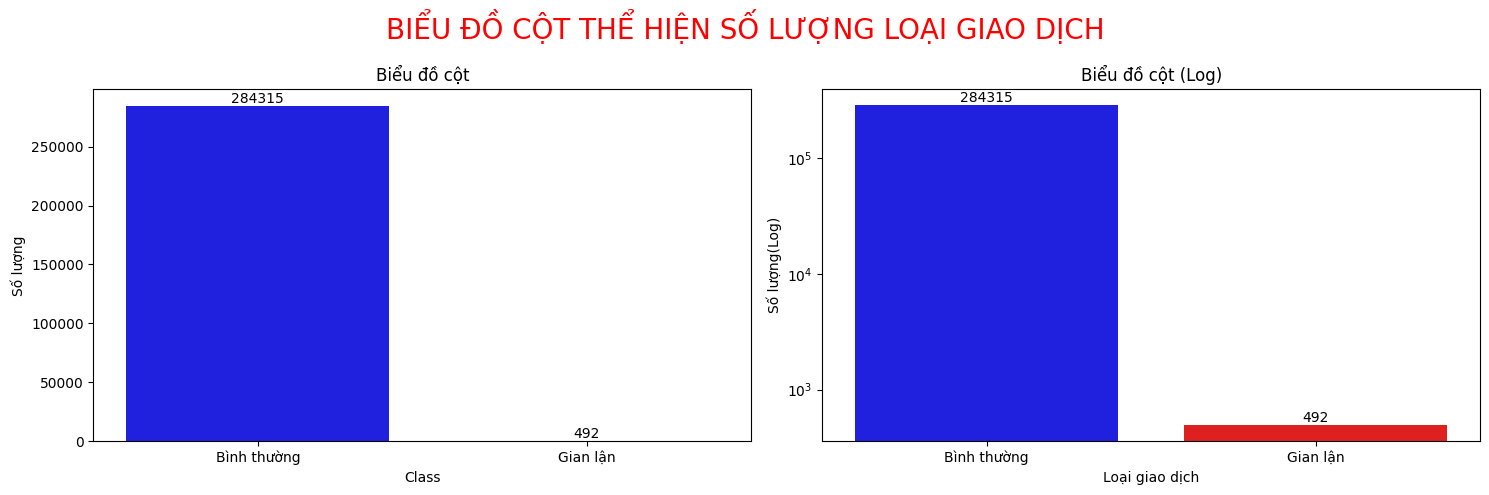

In [9]:
fig1 = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.countplot(x='Class', data = df, palette = {0:'blue',1:'red'}, hue='Class', legend = False)
plt.title('Biểu đồ cột')
plt.xlabel('Class')
plt.ylabel('Số lượng')
plt.xticks([0,1],['Bình thường', 'Gian lận'])
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', fontsize=10)

plt.subplot(1,2,2)
ax2 = sns.countplot(x='Class', data = df, palette = {0:'blue',1:'red'}, hue='Class', legend = False)
plt.title('Biểu đồ cột (Log)')
plt.xlabel('Loại giao dịch')
plt.ylabel('Số lượng(Log)')
plt.yscale('log')
plt.xticks([0,1],['Bình thường', 'Gian lận'])
plt.minorticks_off()
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', fontsize=10)

fig1.suptitle("BIỂU ĐỒ CỘT THỂ HIỆN SỐ LƯỢNG LOẠI GIAO DỊCH", fontsize = 20, color = 'r')
plt.tight_layout()
plt.show()

Từ biểu đồ cột thể hiện số lượng loại giao dịch, ta rút ra được rằng là:
+ Sự chênh lệch "khổng lồ" về số lượng giữa giao dịch Bình thường và Gian lận.
+ Khi train mô hình thì cái tỷ lệ lệch như vậy sẽ ảnh hưởng tới các chỉ số đặc biệt là Accuracy sẽ rất cao nhưng thật ra là vì bị lệch. Vì vậy phải tập trung vào các chỉ số khác thì với bài toán được đặt ra ngay từ ban đầu thì hai chỉ số chính được quan sát:
    + Recall : Chúng ta bắt được bao nhiêu giao dịch gian lận ? (Quan trọng nhất)
    + Precision: Trong tất cả các giao dịch mà mô hình dự đoán là gian lận, có bao nhiêu giao dịch thực sự là gian lận ?
    + F1-score: Độ cân bằng giữa bắt được gian lận và báo nhầm ?
+ Bắt buộc phải xử lý dữ liệu (Resampling).



**Vẽ biểu đồ histogram và boxplot để thấy được phân phối của biến Amount.**
+ Phân tích biến Amount chính là phân tích số tiền bị trộm lấy đi và trả lời cho câu hỏi "các giao dịch gian lận thường trộm bao nhiêu tiền và (nhỏ hay lớn).

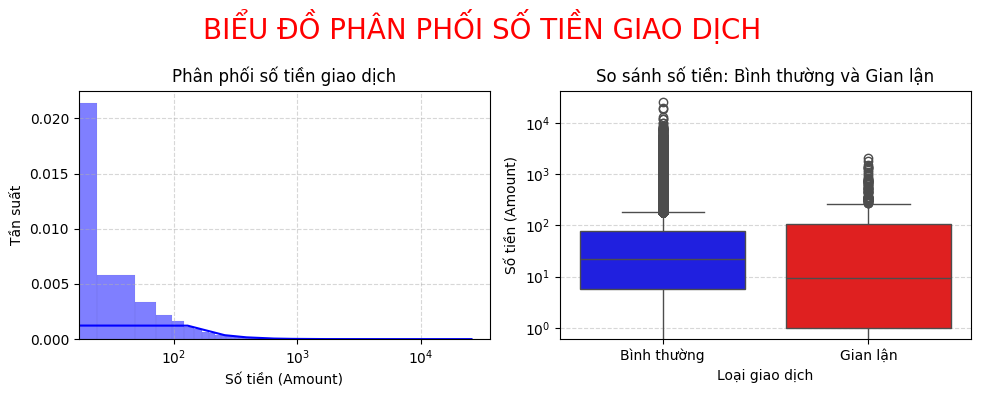

------------------------------------------------------------
SO SÁNH SỐ TIỀN GIAO DỊCH: BÌNH THƯỜNG VS GIAN LẬN


,Bình thường (Non-Fraud),Gian lận (Fraud)
Số lượng,284315.00,492.00
Trung bình,88.29,122.21
Độ lệch chuẩn,250.11,256.68
Min,0.00,0.00
25%,5.65,1.00
Median,22.00,9.25
75%,77.05,105.89
Max,25691.16,2125.87


In [10]:
fig2 = plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(x = 'Amount', data = df, bins = 'auto', kde = True, color = 'blue', stat = 'density')
plt.xlabel('Số tiền (Amount)')
plt.xscale('log')
plt.ylabel('Tần suất')
plt.title('Phân phối số tiền giao dịch')
plt.grid(True, linestyle='--', alpha=0.5)
plt.minorticks_off()

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'Amount', data = df, palette= {0:'blue',1:'red'}, hue = 'Class',legend = False)
plt.xticks([0,1], ['Bình thường', 'Gian lận'])
plt.xlabel('Loại giao dịch')
plt.ylabel('Số tiền (Amount)')
plt.yscale('log')
plt.title('So sánh số tiền: Bình thường và Gian lận')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.minorticks_off()

fig2.suptitle("BIỂU ĐỒ PHÂN PHỐI SỐ TIỀN GIAO DỊCH ", fontsize = 20, color = 'r')
plt.tight_layout()
plt.show()

print("-"*60)
print("SO SÁNH SỐ TIỀN GIAO DỊCH: BÌNH THƯỜNG VS GIAN LẬN")
comparison_df = df.groupby('Class')['Amount'].describe().T
comparison_df.columns = ['Bình thường (Non-Fraud)', 'Gian lận (Fraud)']
comparison_df.index = ['Số lượng', 'Trung bình', 'Độ lệch chuẩn', 'Min', '25%', 'Median', '75%', 'Max']
comparison_df.round(2)

 **Phân tích đặc trưng Số tiền giao dịch (Amount)**

Dựa trên biểu đồ phân phối và bảng thống kê mô tả, ta có những quan sát quan trọng sau về đặc trưng `Amount`:

So sánh giữa Giao dịch Bình thường và Gian lận
- **Khoảng giá trị :** Biểu đồ Boxplot (bên phải) cho thấy khoảng giá trị của giao dịch gian lận (Fraud) không có nhiều khác biệt so với khoảng giá trị của giao dịch bình thường.
    - *Điều này có nghĩa là:* Chúng ta không thể chỉ dùng đơn thuần "Số tiền lớn" để kết luận là gian lận, vì kẻ gian lận cũng thực hiện các giao dịch nhỏ và vừa.
- **Giá trị ngoại lai :** Nhóm "Bình thường" chứa rất nhiều giá trị ngoại lai (các điểm tròn phía trên boxplot), trong khi nhóm "Gian lận" có ít ngoại lai hơn nhưng biên độ dao động cũng khá lớn.

**Vẽ biểu đồ phân phối thời gian của các giao dịch theo thời gian**

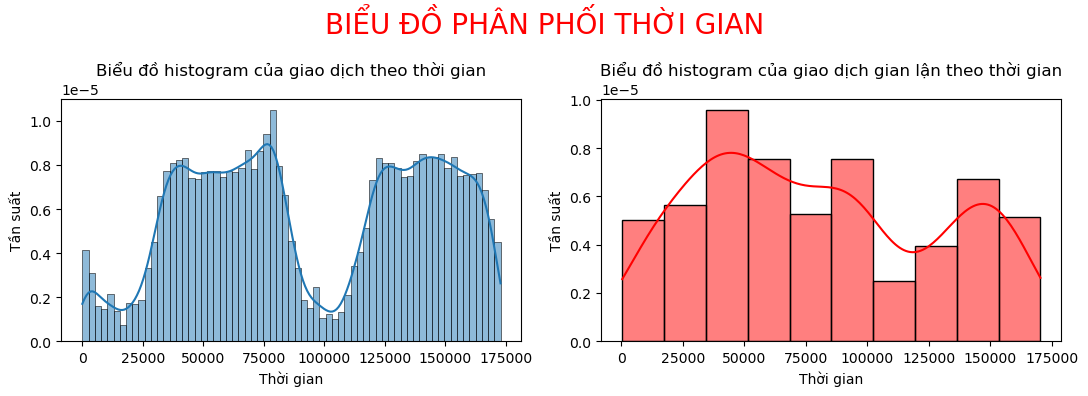

In [36]:
#Phân tích cột Time của bộ dữ liệu
fig3 = plt.figure(figsize = (11,4))

#Chuyển cột time từ giây sang giờ và chia lấy dư cho 24 để lấy theo ngày và gán vào cột Hours
#vì ta cần số lượng giao dịch của từng giờ theo ngày so sánh với số lượng gian lận

plt.subplot(1,2,1)
sns.histplot(x = df['Time'], bins = 'auto', kde = True, stat = 'density')
plt.xlabel('Thời gian')
plt.ylabel('Tần suất')
plt.title('Biểu đồ histogram của giao dịch theo thời gian')

plt.subplot(1,2,2)
fraud_df = df[df['Class'] == 1]
sns.histplot(x = fraud_df['Time'], bins = 'auto', kde = True, color = 'red', stat = 'density')
plt.xlabel('Thời gian')
plt.ylabel('Tần suất')
plt.title('Biểu đồ histogram của giao dịch gian lận theo thời gian')

fig3.suptitle("BIỂU ĐỒ PHÂN PHỐI THỜI GIAN", fontsize = 20, color = 'r')
plt.tight_layout()
plt.show()

**Phân tích đặc trưng Thời gian (Time)**

Biểu đồ so sánh phân phối thời gian giữa giao dịch Bình thường và Gian lận trong vòng 48 giờ (2 ngày) cho thấy những xu hướng hành vi khác biệt:

Tính chu kỳ của giao dịch (Cyclical Pattern)
- **Biểu đồ chung (Bên trái):** Ta thấy rõ **2 đỉnh lớn** tương ứng với 2 ngày dữ liệu.
    - Số lượng giao dịch tăng cao vào ban ngày và giảm mạnh vào ban đêm (phần trũng xuống).
    - Đây là mô hình hành vi tiêu dùng điển hình của con người (ngủ nghỉ vào ban đêm, hoạt động vào ban ngày).

Hành vi của giao dịch Gian lận (Fraud Behavior)
- **Phân phối rải rác**: Khác với giao dịch bình thường, biểu đồ Gian lận (bên phải) không tuân theo quy luật "ngày/đêm" chặt chẽ.
- **Hoạt động bất thường:** Các giao dịch gian lận xuất hiện khá đều đặn, thậm chí có xu hướng duy trì ở mức cao ngay cả trong những khung giờ "thấp điểm" của người dùng bình thường (lúc nửa đêm/rạng sáng).

**Vẽ biểu đồ phân phối đặc trưng PCA theo class**

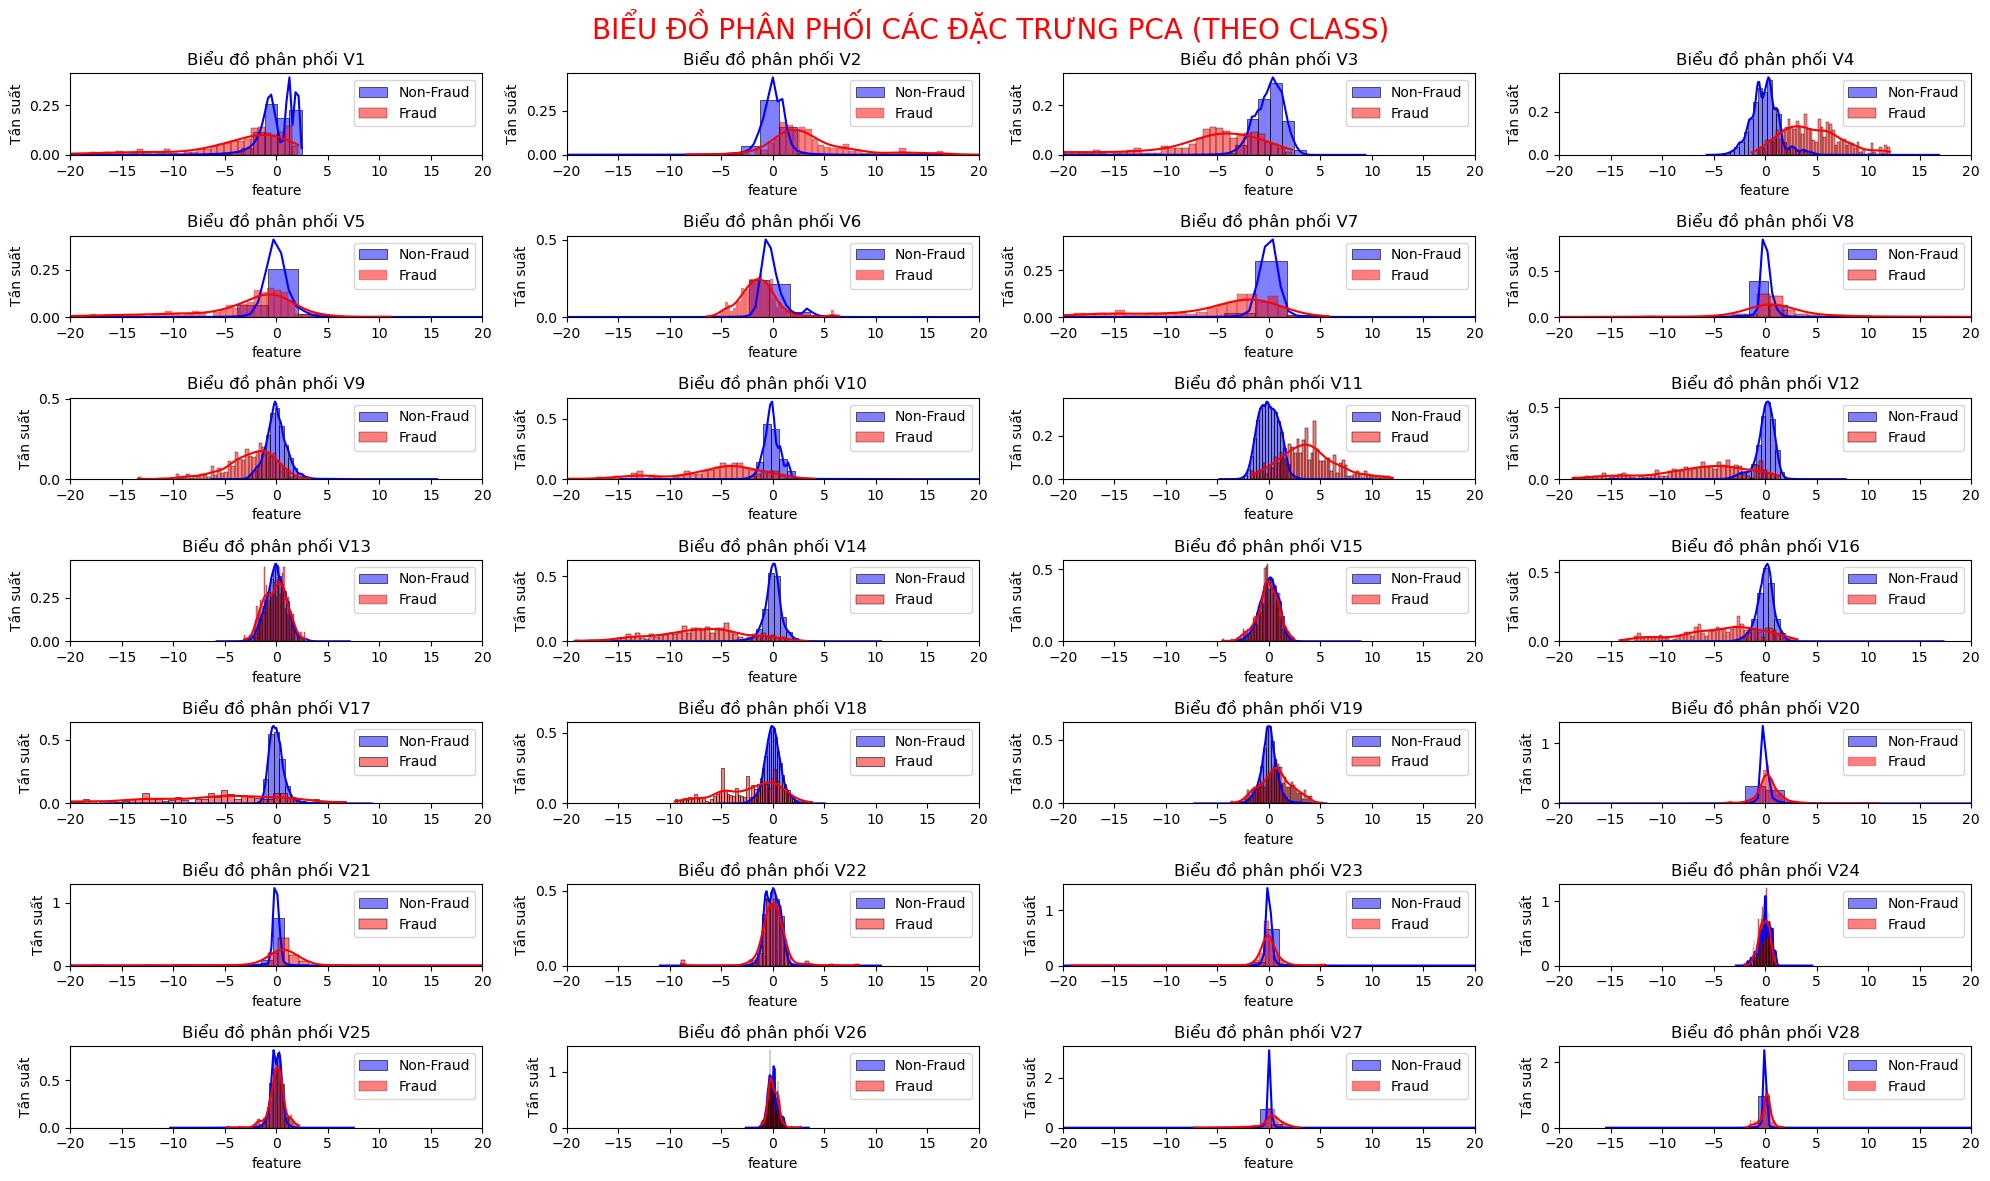

In [37]:
#Biểu đồ phân tích các đặc trưng PCA
fig4 = plt.figure(figsize = (20,12))

for i, feature in enumerate(df.columns[1:29]):
    plt.subplot(7,4, i+1)
    #Áp dụng phân tích theo Class
    sns.histplot(df[df['Class'] == 0][feature], bins = 50, kde = True, color = 'blue', alpha = 0.5, label = 'Non-Fraud', stat = 'density')
    sns.histplot(df[df['Class'] == 1][feature], bins = 50, kde = True, color = 'red' ,alpha = 0.5, label = 'Fraud', stat = 'density')
    plt.xlim(-20,20)
    plt.xlabel('feature')
    plt.ylabel('Tần suất')
    plt.title(f'Biểu đồ phân phối {feature}')
    plt.legend()

fig4.suptitle("BIỂU ĐỒ PHÂN PHỐI CÁC ĐẶC TRƯNG PCA (THEO CLASS) ", fontsize = 20, color = 'r')
plt.tight_layout()


- Một số feature (V13, V15, V22, V24, V25, V26, V28) không cho thấy nhiều khác biệt giữa những giao dịch bình thường và giao dịch lừa đảo.
- Nhưng ở nhiều feature khác (V1, V2, V3, ...), class lừa đảo có phân phối hoàn toàn khác so với class không lừa đảo.
- Ở hầu hết các phân phối, biểu đồ của class lừa đảo thường rộng hơn, trong khi đó biểu đồ của class lừa đảo thường hẹp.
- --> Những giao dịch không lừa đảo thì ổn định và nhất quán hơn, còn giao dịch lừa đảo thì bất thường

# **3. TIỀN XỬ LÝ DỮ LIỆU**

**Tạo hàm đánh dấu các giao dịch có số tiền lớn hơn 1000**

In [38]:
def add_Is_High_Amount(df):
    df['Is_High_Amount'] = (df['Amount'] > 1000).astype(int)
    return df

**Tạo hàm vẽ biểu đồ phân phối của cột Is_High_Amount**

In [ ]:
def analyze_feature(df, col, target = 'Class'):
    fig = plt.figure(figsize = (10,4))
    
    #Biểu đồ 1
    plt.subplot(1,2,1)
    sns.countplot(x = col, data = df, hue = target, palette= {0:'blue',1:'red'})
    plt.xticks([0,1], ['Is_high_amount = 0', 'Is_high_amount = 1'])
    plt.ylabel('Số lần giao dịch')
    plt.yscale('log')
    plt.minorticks_off()
    plt.title(f'Biểu đồ cột của các giá trị trong cột {col}')
    
    #Biểu đồ 2
    plt.subplot(1,2,2)
    df_feature = (df.groupby(col)[target].mean()).reset_index()
    df_feature.columns = [col, target]
    
    sns.barplot(data = df_feature, x = col , y = target, hue = col)
    plt.title(f'Biểu đồ cột thể hiện tỉ lệ gian lận của {target} theo {col}')
    plt.ylabel(f'Tỷ lệ gian lận')
    
    fig.suptitle(f'BIỂU ĐỒ PHÂN PHỐI {col}', fontsize = 20, color = 'r')
    plt.tight_layout()
    plt.show()
    return

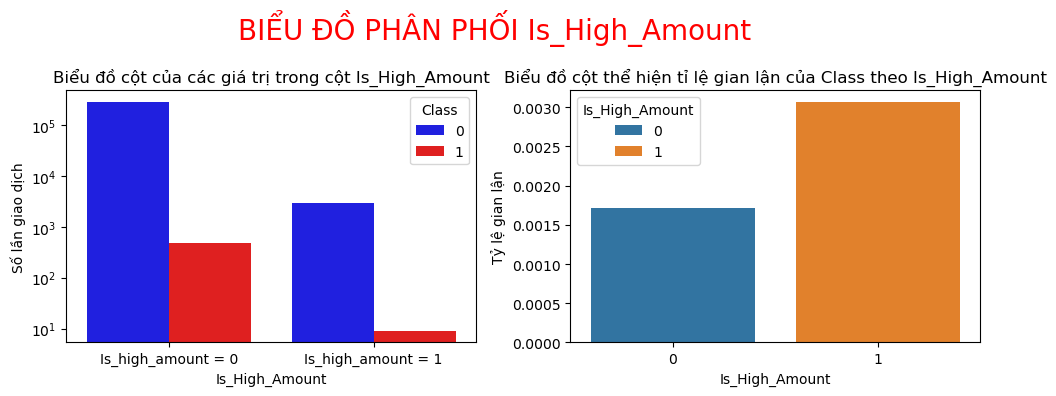

In [42]:
df = add_Is_High_Amount(df)
analyze_feature(df, 'Is_High_Amount', 'Class')

**Phân tích Feature kỹ thuật: Is_High_Amount (Giao dịch giá trị lớn)**

Chúng ta đặt ngưỡng (threshold) là 1000 đơn vị tiền tệ để tạo ra feature mới: `Is_High_Amount` (1 nếu Amount > 1000, ngược lại là 0).


- **Về số lượng (Biểu đồ bên trái - Log Scale):**
    - Đa số tuyệt đối các giao dịch nằm ở nhóm giá trị nhỏ (`Is_High_Amount = 0`).
    - Số lượng giao dịch giá trị lớn (> 1000) rất ít, và số lượng giao dịch Gian lận trong nhóm này lại càng hiếm hoi.

- **Về tỷ lệ gian lận (Biểu đồ bên phải):**
    - Tỷ lệ gian lận ở nhóm tiền nhỏ (`0`) là khoảng **0.17%**.
    - Tỷ lệ gian lận ở nhóm tiền lớn (`1`) tăng vọt lên hơn **0.30%**.

**Kết luận quan trọng:**
- **Xác suất rủi ro cao hơn:** Mặc dù số lượng ca gian lận giá trị lớn là ít (do tổng số giao dịch lớn vốn ít), nhưng **xác suất xảy ra gian lận** (Conditional Probability) khi gặp một giao dịch giá trị lớn lại **cao gấp gần 2 lần** so với giao dịch nhỏ.
- **Giá trị của Feature:** Biến `Is_High_Amount` mang lại thông tin dự báo tốt. Nó giúp mô hình "chú ý" hơn vào các giao dịch giá trị lớn thay vì bị lấn át bởi số lượng khổng lồ của các giao dịch nhỏ.

**Chuẩn hóa đặc trưng "Amount"**

Như đã phân tích ở phần trước, đặc trưng `Amount` (Số tiền giao dịch) có phân phối lệch phải và chứa nhiều giá trị ngoại lai (outliers). Việc sử dụng các phương pháp chuẩn hóa thông thường như `MinMaxScaler` hay `StandardScaler` sẽ bị ảnh hưởng nặng nề bởi các ngoại lai này, dẫn đến việc dữ liệu bị co cụm hoặc méo mó.

Do đó, chúng ta sử dụng **RobustScaler**.

* **Cơ chế:** `RobustScaler` loại bỏ trung vị (median) và chia tỷ lệ dữ liệu theo khoảng tứ phân vị (Interquartile Range - IQR).
* **Công thức:**
    $$x_{scaled} = \frac{x - Q_2}{Q_3 - Q_1}$$
    (Trong đó $Q_1, Q_2, Q_3$ lần lượt là tứ phân vị thứ 1, trung vị, và tứ phân vị thứ 3).
* **Lợi ích:** Giúp mô hình ít bị nhạy cảm với các giao dịch có giá trị đột biến, đưa dữ liệu về cùng một miền giá trị để thuật toán tối ưu hóa hoạt động hiệu quả hơn.

In [16]:
rob_scaler = RobustScaler()
scaled_amount = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))                                    

df.drop(['Amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)

# **4. XỬ LÝ DỮ LIỆU**

**Tách biến đặc trưng và biến mục tiêu**

In [17]:
X = df.drop(columns = ['Class','Time'])
y = df['Class']

**Dữ liệu mất cân bằng, các phương pháp được thực hiện:**
  - Random Under-Sampling là phương pháp giảm số lượng mẫu của lớp đa số ( chính là lớp giao dịch bình thường) bằng cách xóa ngẫu nhiên các điểm này.
  - SMOTE (Synthetic Minority Over-sampling Technique) là phương pháp tăng số lượng mẫu lớp thiểu số (chính là lớp giao dịch gian lận) bằng cách tạo mẫu giả.
  - SMOTE + RUS là SMOTE để tăng thiểu số và RUS để giảm đa số theo tỉ lệ khác nhau.
  - SMOTETomek là SMOTE để tăng thiểu số và Tomek sẽ xóa các điểm đa số ở các vùng biên gần nhau.
* Lưu ý: Ta cần thực hiện bước này sau khi đã chia tách dữ liệu thành hai tập train và tập test để tránh nguy cơ "data leakage". VD: nếu chúng ta áp dụng SMOTE trước khi chia tập train và test:
    * SMOTE sẽ sử dụng toàn bộ sample của giao dịch gian lận gốc (kể cả những sample lát nữa sẽ vào tập test) để tạo ra những dữ liệu gian lận mới
    * Khi chúng ta chia, một số dữ liệu gian lận mới (được tạo nên từ tập test) sẽ vào tập train
    * Từ đó gây ra nguy cơ là: kể cả khi điểm test rất cao, khi đưa vào thực tế điểm lại rất thấp

**Chia tập huấn luyện**
* Ở bước này, chia dữ liệu thành 2 phần: 80% để huấn luyện mô hình (Training Set) và 20% để kiểm tra đánh giá (Test Set).

* stratify = y đảm bảo rằng nếu tập gốc có 0.17% gian lận, thì cả tập Train và tập Test đều giữ nguyên tỷ lệ 0.17% đó.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

df_train_test = pd.DataFrame({
                              'Dữ liệu' : ['Train', 'Test'],
                              'Số lượng mẫu X': [X_train.shape[0], X_test.shape[0]],
                              'Số lượng mẫu y' : [y_train.shape[0], y_test.shape[0]],
                              'Tỷ lệ gian lận': [f'{y_train.mean()*100:.4f}%', f'{y_test.mean()*100:.4f}%']
                              })
df_train_test.set_index('Dữ liệu', inplace = True)
df_train_test.transpose().round(4)

Dữ liệu,Train,Test
Số lượng mẫu X,227845,56962
Số lượng mẫu y,227845,56962
Tỷ lệ gian lận,0.1729%,0.1720%


In [ ]:
def imbalanced_data_processing(X_train, y_train):
    results = {'original' : (X_train, y_train)}
    
    #Random Under-Samping
    rus = RandomUnderSampler(sampling_strategy = 0.5, random_state = 42)
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
    results['under_sampling'] = (X_train_rus, y_train_rus)
    
    #SMOTE
    smote = SMOTE(sampling_strategy= 0.2, random_state = 42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    results['smote'] = (X_train_smote, y_train_smote)
    
    #SMOTE + RUS
    pipeline = Pipeline(steps = [('o', smote),('u',rus)])
    X_train_rus_smote, y_train_rus_smote = pipeline.fit_resample(X_train, y_train)
    results['smote_rus'] = (X_train_rus_smote, y_train_rus_smote)
    
    #SMOTETomek
    smt = SMOTETomek(smote=SMOTE(sampling_strategy=0.2, random_state=42), tomek=TomekLinks(sampling_strategy='majority'))
    X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
    results['smotetomek'] = (X_train_smt, y_train_smt)
    
    return results

In [20]:
resample_data = imbalanced_data_processing(X_train, y_train)

## **5.** HUẤN LUYỆN VÀ ĐÁNH GIÁ MÔ HÌNH


**Lựa chọn mô hình đối với dữ liệu mất cân bằng**

**Logistic Regression**: Mô hình tuyến tính cho bài toán phân loại nhị phân.
*   Nó tìm một đường (hoặc mặt phẳng) để chia dữ liệu thành hai nhóm:
    *   Nhóm bình thường
    *   Nhóm gian lận
*   Huấn luyện nhanh, phù hợp làm baseline model
*   Rất nhạy với class imbalance
*   Độ chính xác nhìn có vẻ cao nhưng bỏ sót gần toàn bộ gian lận -> do hàm mất mát bị chi phối bởi lớp đa số.

**Random Forest**: là tập hợp của rất nhiều decision tree.
*   Mỗi cây: Chia dữ liệu bằng các câu hỏi dạng “có / không” dùng:
    * Bootstrap sampling
    * Random feature selection
*   Học một phần khác nhau của dữ liệu
*   Cây quyết định ưu tiên lớp chiếm đa số
*   Gian lận dễ bị “chìm” trong các nhánh sâu
*   Quyết định cuối là bỏ phiếu bởi đa số các cây

**XGBoost**: Xây dựng cây tuần tự:
*   Cây sau học cách sửa lỗi của cây trước
*   Điểm nào bị dự đoán sai → được chú ý nhiều hơn
*   Tập trung vào các điểm khó dự đoán mà ở đây là các điểm gian lận
*   Cực kỳ nhạy với dữ liệu nhiễu

**Độ phù hợp các mô hình đối với dữ liệu mất cân bằng:**

XGBoost -> Random Forest -> Logistic Regression

**Các chỉ số cần lưu ý để đánh giá mô hình**
*   Accuracy: Tỷ lệ phần trăm số lần mô hình đoán đúng trên tổng số mẫu.
*   Recall: Tỷ lệ phát hiện gian lận
*   Precision: Độ chính xác khi dự báo gian lận
*   F1-score: Sự cân bằng của Precision và Recall
*   Confusion matrix: Tóm tắt hiệu suất của một mô hình, gồm 4 ô (theo thứ tự từ trên xuống dưới, từ trái sang phải): True Negative, False positive, False negative, True positive
*   ROC-AUC (Diện tích dưới đừng cong ROC):
    * Trục X: False Positive Rate (Tỷ lệ bắt nhầm giao dịch bình thường)
    * Trục Y: True Positive Rate (Tỷ lệ bắt đúng giao dịch lừa đảo)
    * ROC-AUC cho ta biết xác suất model xếp một giao dịch gian lận cao điểm hơn một giao dịch thường bất kỳ.
*   PR-AUC (Diện tích dưới đường cong Precision-Recall):
    * Trục X: Recall ( Trong số các giao dịch mà mô hình báo là gian lận, có bao nhiêu phần trăm là gian lận thật ? )
    * Trục Y: Precision ( Mô hình tìm ra được bao nhiêu phần trăm trong tổng số giao dịch gian lận hực tế ? )
    * PR-AUC: cho ta thấy sự tương quan giữa điểm recall và điểm precision (Khi recall tăng thì precision giảm bao nhiêu và ngược lại)

Đối với mục tiêu bài toán là chấp nhận bắt nhầm giao dịch bình thường và ưu tiên bắt các giao dịch gian lận thì ta sẽ chọn PR-AUC là chỉ số quan trọng nhất vì:
*   Dữ liệu cực kỳ mất cân bằng (gian lận rất ít)
*   Accuracy và ROC-AUC đánh lừa
*   PR-AUC:
    *   Tập trung trực tiếp vào lớp gian lận
    *   Phản ánh đánh đổi giữa bắt đúng gian lận và báo động giả
    *   PR-AUC dùng để so sánh mô hình và tối ưu tham số

**Tạo hàm tính toán các chỉ số**

In [ ]:
def calculate_model_metric(model, X_test, y_test, m_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    #Tính toán các chỉ số
    cm = confusion_matrix(y_test, y_pred)
    pr_auc = average_precision_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return {
          'y_pred': y_pred,
          'y_prob': y_prob,
          'recall': recall,
          'precision': precision,
          'f1_scores': f1,
          'pr_auc': pr_auc,
          'cm': cm
          }

**Tạo hàm để train các model**

In [22]:
def train_multi_models(models_selection, resample_data, X_test, y_test):
    results = {}
    
    for method, (X_train_resample, y_train_resample) in resample_data.items():
        print(f">>>> ĐANG TRAIN DATA-SET VỚI PHƯƠNG THỨC {method.upper()} <<<<")
        print("-"*50)
        for model_name, model in models_selection.items():
            print(f"\n>>>> MODEL ĐANG SỬ DỤNG: {model_name.upper()} <<<<")
            
            if model_name not in results:
                results[model_name] = {}
            
            if method == 'original':
                if model_name == 'XGBoost':
                  scale_ratio = (y_train_resample == 0).sum() / (y_train_resample == 1).sum()
                  model.set_params(scale_pos_weight = scale_ratio)
                elif model_name == 'Logistic':
                  model.set_params(logistic__class_weight = 'balanced')
                else:
                  model.set_params(class_weight = 'balanced')
            else:
                if model_name == 'XGBoost':
                  model.set_params(scale_pos_weight = 1)
                elif model_name == 'Logistic':
                  model.set_params(logistic__class_weight = None)
                else:
                  model.set_params(class_weight = None)
            
            model.fit(X_train_resample,y_train_resample)
            results[model_name][method] = calculate_model_metric(model, X_test, y_test, method)
            print(f"\n --ĐÃ TRAIN XONG {model_name.upper()}--")
        print("-"*150)
    
    return results

In [ ]:
result = {
    'Logistic':{
        'rus':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...},
        'smote':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...},
        'smote_rus':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...},
        'smotetomek':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...}
        },
    'RandomForest':{
        'rus':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...},
        'smote':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...},
        'smote_rus':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...},
        'smotetomek':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...}
    },
    'XGBoost':{
        'rus':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...},
        'smote':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...},
        'smote_rus':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...},
        'smotetomek':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...}
    }
}

In [ ]:
models_selection =  {
                      'Logistic': LogisticRegression(random_state = 42, max_iter = 1000),
                      'RandomForest': RandomForestClassifier(n_estimators = 50, random_state = 42, max_depth = 15,
                                     n_jobs = -1),
                      'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1)
                      }
results = train_multi_models(models_selection, resample_data, X_test, y_test)

>>>> ĐANG TRAIN DATA-SET VỚI PHƯƠNG THỨC ORIGINAL <<<<
--------------------------------------------------

>>>> MODEL ĐANG SỬ DỤNG: LOGISTIC <<<<

 --ĐÃ TRAIN XONG LOGISTIC--

>>>> MODEL ĐANG SỬ DỤNG: RANDOMFOREST <<<<

 --ĐÃ TRAIN XONG RANDOMFOREST--

>>>> MODEL ĐANG SỬ DỤNG: XGBOOST <<<<

 --ĐÃ TRAIN XONG XGBOOST--
------------------------------------------------------------------------------------------------------------------------------------------------------
>>>> ĐANG TRAIN DATA-SET VỚI PHƯƠNG THỨC UNDER_SAMPLING <<<<
--------------------------------------------------

>>>> MODEL ĐANG SỬ DỤNG: LOGISTIC <<<<

 --ĐÃ TRAIN XONG LOGISTIC--

>>>> MODEL ĐANG SỬ DỤNG: RANDOMFOREST <<<<

 --ĐÃ TRAIN XONG RANDOMFOREST--

>>>> MODEL ĐANG SỬ DỤNG: XGBOOST <<<<

 --ĐÃ TRAIN XONG XGBOOST--
------------------------------------------------------------------------------------------------------------------------------------------------------
>>>> ĐANG TRAIN DATA-SET VỚI PHƯƠNG THỨC SMOTE <<<<
--

**Kết quả tốt nhất cho từng loại model**

In [ ]:
def best_method(results, y_test):
    print(">>>> TỔNG HỢP KẾT QUẢ TỐT NHẤT CHO TỪNG LOẠI MODEL <<<<")
    models_best_method = {}
    for model_name, model_methods in results.items():
        models_best_method[model_name] = {}
        summary_df = []
        for method, metrics in model_methods.items():
            summary_df.append({
                                'Method': method,
                                'PR-AUC': metrics['pr_auc'],
                                'Recall': metrics['recall'],
                                'Precision':metrics['precision'],
                                'F1_Score': metrics['f1_scores']
                            })    
        df_summary = pd.DataFrame(summary_df)
        df_summary.sort_values(by = ['PR-AUC','Recall','F1_Score','Precision'], ascending = False, inplace = True)
        best_method = df_summary.iloc[0]['Method']
        models_best_method[model_name][best_method] = model_methods[best_method]
        
        print(f"\n MODEL: {model_name.upper()}")
        print(f"   -> Method tối ưu nhất: {best_method}")
        print(f"   -> Recall:  {models_best_method[model_name][best_method]['recall']:.4f}")
        print(f"   -> Precision:  {models_best_method[model_name][best_method]['precision']:.4f}")
        print(f"   -> F1-Score: {models_best_method[model_name][best_method]['f1_scores']:.4f}")
        print("-" * 30)
        
        fig, axes = plt.subplots(1, 2, figsize=(18, 5))
        fig.suptitle(f"HIỆU SUẤT: {model_name.upper()} ({best_method.upper()})", fontsize=16, color='r', fontweight='bold')
        
        cm = models_best_method[model_name][best_method]['cm']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
        axes[0].set_title('Confusion Matrix')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('Actual')
        
        y_prob = models_best_method[model_name][best_method]['y_prob']
        PrecisionRecallDisplay.from_predictions(y_test, y_prob, ax=axes[1], color='b')
        axes[1].set_title('Precision-Recall Curve')
        axes[1].grid(True, alpha=0.3)
        axes[1].legend(loc='lower left')
        
        plt.tight_layout()
        plt.show()
    return models_best_method

In [ ]:
models_best_method = {
    'Logistic':{
        'rus':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...}
        },
    'RandomForest':{
        'rus':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...}
    },
    'XGBoost':{
        'rus':{'y_pred':...,'y_prob':...,'recall':...,'precision':...,'f1_scores':...,'pr_auc':...,'cm':...}
    }
}

>>>> TỔNG HỢP KẾT QUẢ TỐT NHẤT CHO TỪNG LOẠI MODEL <<<<

 MODEL: LOGISTIC
   -> Method tối ưu nhất: smote
   -> Recall:  0.8878
   -> Precision:  0.2138
   -> F1-Score: 0.3446
------------------------------


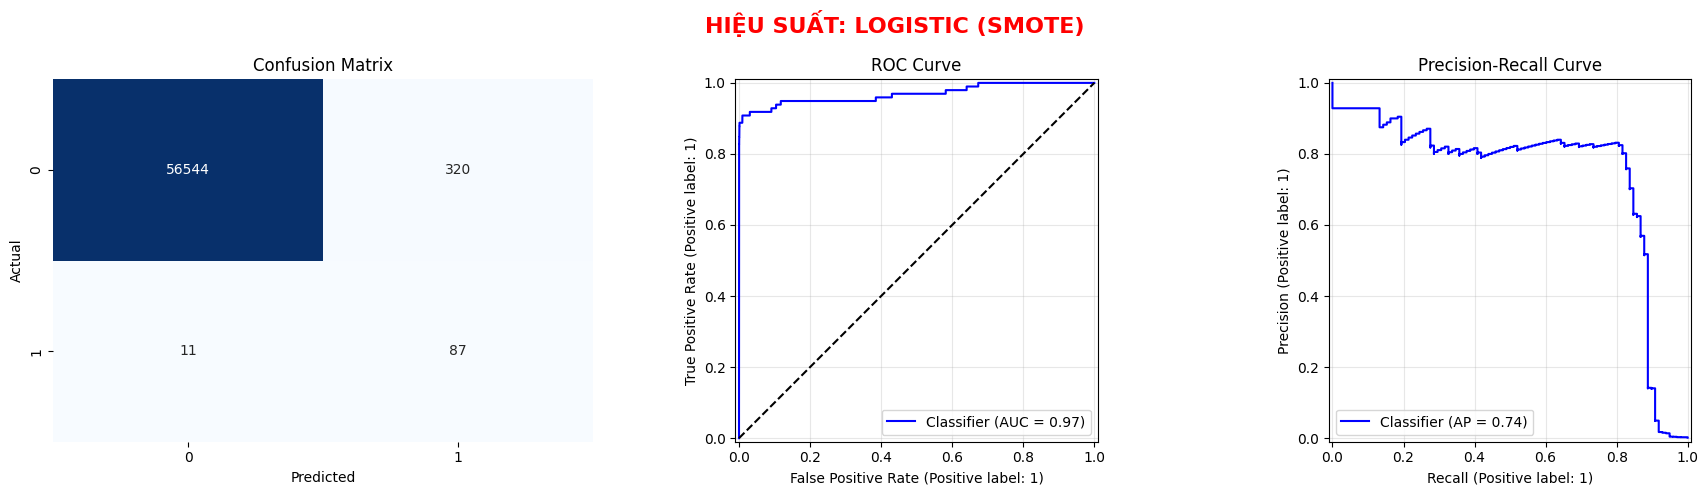


 MODEL: RANDOMFOREST
   -> Method tối ưu nhất: smote
   -> Recall:  0.8469
   -> Precision:  0.8218
   -> F1-Score: 0.8342
------------------------------


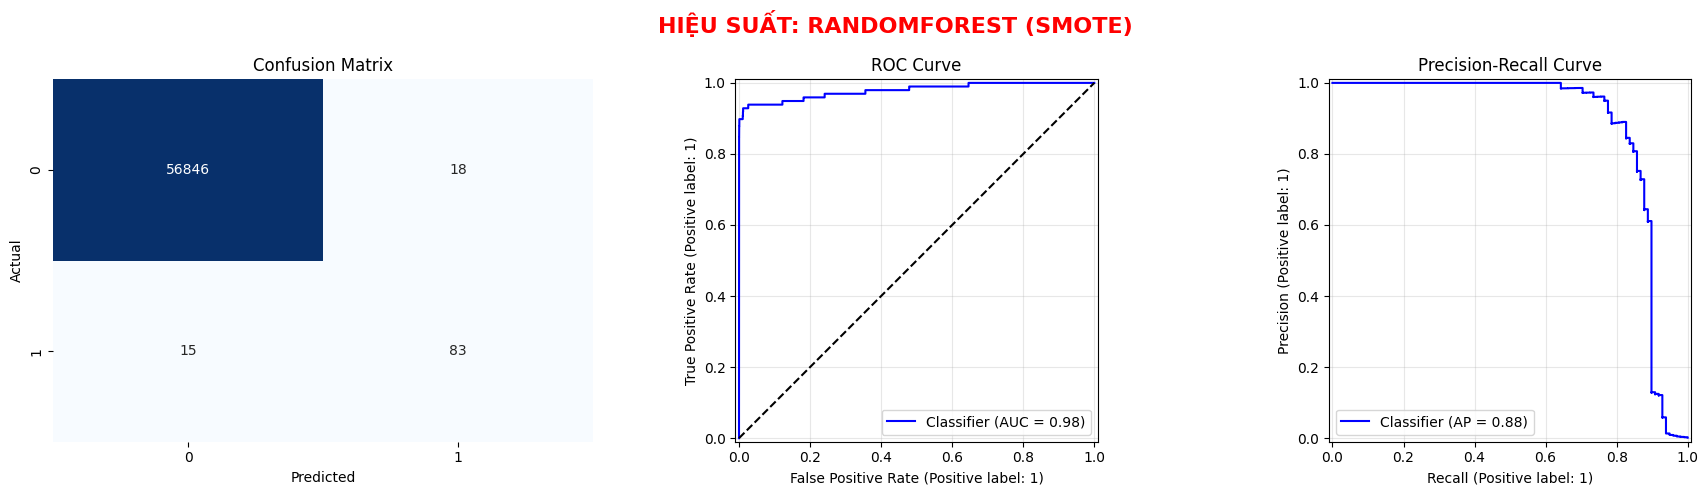


 MODEL: XGBOOST
   -> Method tối ưu nhất: original
   -> Recall:  0.8571
   -> Precision:  0.8936
   -> F1-Score: 0.8750
------------------------------


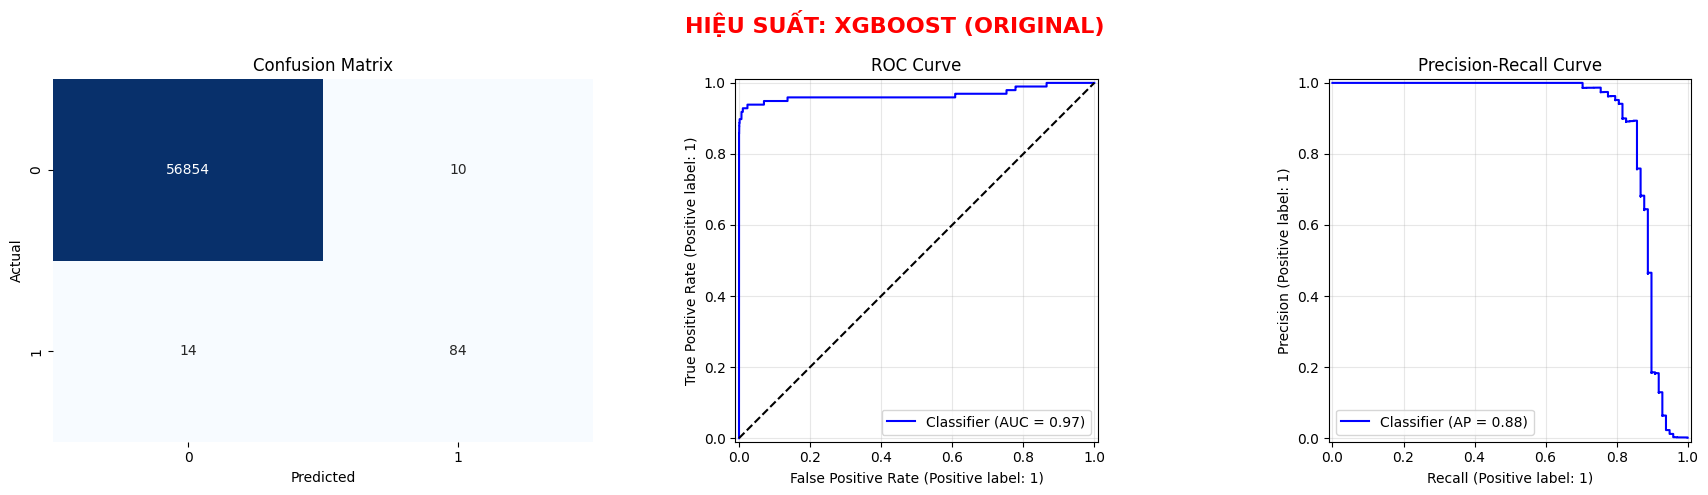

In [25]:
models_best_method = best_method(results, y_test)

# **6. TỐI ƯU HÓA MÔ HÌNH SỬ DỤNG GridSearchCV**


**Tạo hàm tối ưu tham số cho từng model**

In [ ]:
def optimize_models(models_best_method, X_train, y_train, X_test, y_test):
    print(">>>> TỐI ƯU HÓA THAM SỐ CHO TỪNG MODEL <<<<\n")
    models = {}
    for model_name, model_method in models_best_method.items():

        best_method_name = list(model_method.keys())[0]
        steps = []
        if best_method_name == 'under_sampling':
            steps.append(('sampler', RandomUnderSampler(sampling_strategy = 0.5, random_state = 42)))
        elif best_method_name == 'smote':
            steps.append(('sampler', SMOTE(sampling_strategy= 0.2, random_state = 42)))
        elif best_method_name == 'smote_rus':
            steps.append(('sampler1', SMOTE(sampling_strategy= 0.2, random_state = 42)))
            steps.append(('sampler2', RandomUnderSampler(sampling_strategy = 0.5, random_state = 42)))
        elif best_method_name == 'smotetomek':
            steps.append(('sampler', SMOTETomek(smote=SMOTE(sampling_strategy=0.2, random_state=42), tomek=TomekLinks(sampling_strategy='majority'))))
        print(f"Đang tinh chỉnh tham số của phương thức {best_method_name} cho {model_name}....\n")
        
        model = None
        param_grid = {}
        
        if model_name == 'Logistic':
            cw = 'balanced' if best_method_name == 'original' else None
            steps.append(('logistic', LogisticRegression(random_state=42, max_iter=2000, solver='liblinear', class_weight=cw)))
            model = Pipeline(steps)
            param_grid = {
                        'logistic__C': [0.01, 0.1, 1, 10],
                        'logistic__penalty': ['l1','l2']
                        }
        
        elif model_name == 'RandomForest':
            cw = 'balanced' if best_method_name == 'original' else None
            steps.append(('rf', RandomForestClassifier(random_state = 42, n_jobs = -1, class_weight = cw)))
            model = Pipeline(steps)
            param_grid = {
                        'rf__n_estimators': [100, 200],
                        'rf__max_depth': [10, 15],
                        'rf__min_samples_split': [2, 5]
                        }
        
        elif model_name == 'XGBoost':
            if best_method_name == 'original':
                ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
                scale_pos = ratio
            else:
                scale_pos = 1
            steps.append(("xgb", XGBClassifier(eval_metric = 'logloss', random_state = 42, n_jobs = -1, scale_pos_weight = scale_pos)))
            model = Pipeline(steps)
            param_grid = {
                        'xgb__n_estimators': [100, 200],
                        'xgb__learning_rate': [0.01, 0.1],
                        'xgb__max_depth': [3, 6]
                        }
            
        cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
        grid = GridSearchCV(estimator = model, param_grid = param_grid,
                            scoring='average_precision', cv = cv, verbose=0, n_jobs=-1)
        grid.fit(X_train, y_train)
        
        print("Best Params:", grid.best_params_)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
        print("Recall:", recall_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("f1-score: ", f1_score(y_test, y_pred))
        print("\n")
        
        models[model_name] = best_model
    return models

In [34]:
final_models = optimize_models(models_best_method, X_train, y_train, X_test, y_test)

>>>> TỐI ƯU HÓA THAM SỐ CHO TỪNG MODEL <<<<

Đang tinh chỉnh tham số của phương thức smote cho Logistic....

Best Params: {'logistic__C': 0.01, 'logistic__penalty': 'l2'}
Recall: 0.8877551020408163
Precision: 0.2196969696969697
f1-score:  0.3522267206477733


Đang tinh chỉnh tham số của phương thức smote cho RandomForest....

Best Params: {'rf__max_depth': 15, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Recall: 0.8673469387755102
Precision: 0.8095238095238095
f1-score:  0.8374384236453202


Đang tinh chỉnh tham số của phương thức original cho XGBoost....

Best Params: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 200}
Recall: 0.8469387755102041
Precision: 0.8736842105263158
f1-score:  0.8601036269430051




**Các bước thực hiện của hàm tối ưu tham số:**
*   Xác định phương pháp xử lý mất cân bằng dữ liệu (lấy mẫu) tương ứng với từng mô hình trong models_best_method
*   Thiết lập tham số class_weight = balanced chỉ khi sử dụng dữ liệu gốc (original), vì:
    *   Mỗi lỗi dự đoán sai lớp gian lận sẽ bị phạt nặng hơn, buộc mô hình chú ý nhiều hơn đến lớp gian lận.
    *   Khi đã áp dụng các phương pháp như SMOTE, undersampling,… dữ liệu đã được cân bằng tương đối.
    *   Nếu tiếp tục dùng class_weight trong trường hợp này có thể làm mô hình quá nhạy, dẫn đến tăng false positive.
*   Xây dựng pipeline gồm:
    *   Bước xử lý mất cân bằng (nếu có)
    *   Mô hình phân loại tương ứng (Logistic Regression, Random Forest hoặc XGBoost).
*   Thiết lập tập tham số cần tối ưu (param_grid) riêng cho từng mô hình.
*   Sử dụng Stratified K-Fold (k = 3) để chia dữ liệu huấn luyện thành 3 phần, đảm bảo tỷ lệ lớp gian lận và bình thường được giữ nguyên:
    *   Mỗi lần lấy 1 phần làm tập đánh giá
    *   2 phần còn lại làm tập huấn luyện
    *   Lặp lại cho đến khi mỗi phần đều được dùng làm tập đánh giá một lần.
*   Áp dụng GridSearchCV để:
    *   Thử tất cả các tổ hợp tham số trong param_grid
    *   Với mỗi tổ hợp, đánh giá bằng Stratified K-Fold
    *   Điểm đánh giá cuối cùng là giá trị trung bình của các fold, sử dụng thước đo average_precision.
*   So sánh điểm trung bình của tất cả các tổ hợp tham số và lựa chọn bộ tham số có kết quả tốt nhất cho từng mô hình.
*   Huấn luyện mô hình với bộ tham số tối ưu trên toàn bộ tập huấn luyện và lưu mô hình tốt nhất vào final_models.

# **7. TÌM NGƯỠNG TỐI ƯU**





In [35]:
best_model = final_models['RandomForest']

**Tạo hàm tìm ngưỡng tối ưu**

In [ ]:
def predict_with_threshold(model, X, threshold = 0.5):
    scores = model.predict_proba(X)[:, 1]
    return (scores >= threshold).astype(int)

def evaluate_threshold(model, X_test, y_test, threshold):
    y_pred = predict_with_threshold(model, X_test, threshold)
    
    return {
        "threshold": threshold,
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }

def threshold_curve(model, X_test, y_test, thresholds=np.linspace(0.1, 0.9, 9)):
    results = []
    
    for t in thresholds:
        res = evaluate_threshold(model, X_test, y_test, t)
        results.append(res)
    
    return results

**Vẽ biểu đồ threshhold**

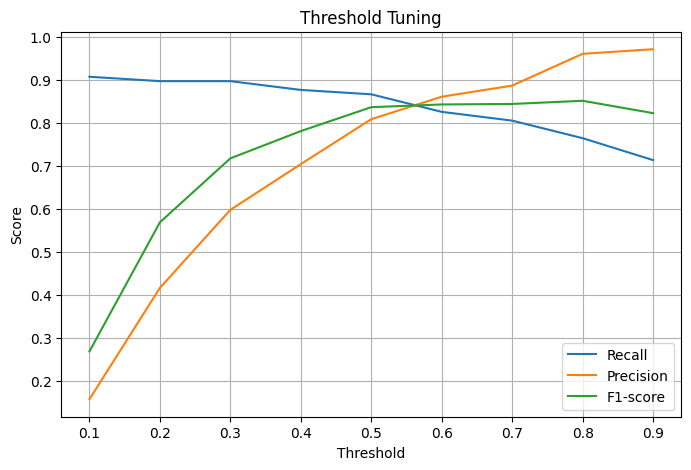

In [37]:
results = threshold_curve(
    model=best_model,
    X_test=X_test,
    y_test=y_test
)

thresholds = [r["threshold"] for r in results]
recalls = [r["recall"] for r in results]
precisions = [r["precision"] for r in results]
f1s = [r["f1"] for r in results]

plt.figure(figsize=(8,5))
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, f1s, label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning")
plt.legend()
plt.grid(True)
plt.show()

**Chọn threshold mới = 0.4 để tối ưu điểm recall. Đồng thời điểm precision và f1 vẫn ở mức chấp nhận được**


**Tiếp đến ta vẽ confusion matrix giữa hai điểm threshold 0.5 và 0.4 để thể hiện rõ kết quả**

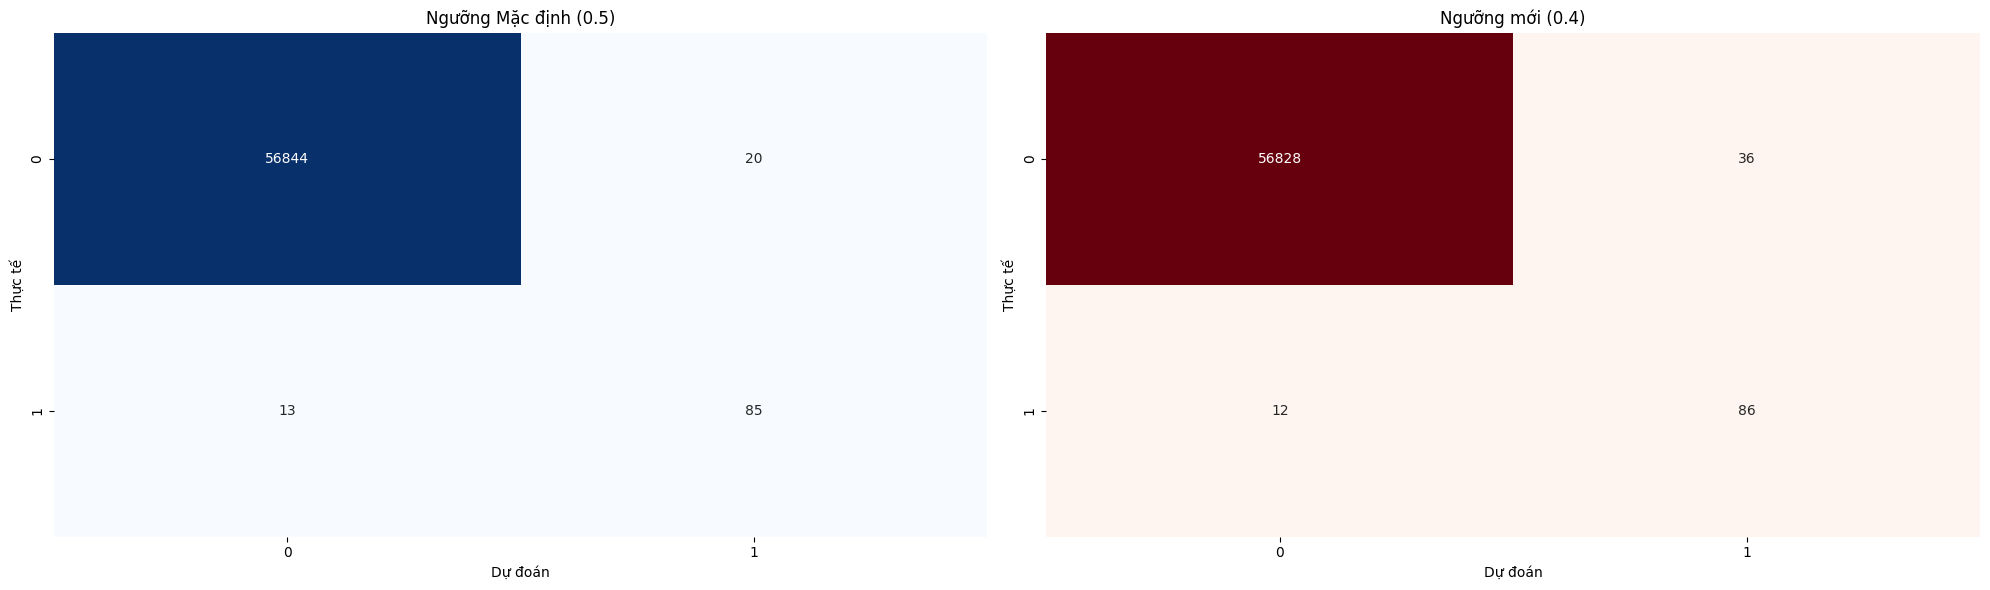

In [38]:
tuned_threshold = 0.4
y_pred = best_model.predict(X_test)

y_prob = best_model.predict_proba(X_test)[:, 1]
y_tuning_pred = (y_prob > tuned_threshold).astype(int)


fig,ax = plt.subplots(1,2, figsize = (20,6))
cm_default = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
ax[0].set_title('Ngưỡng Mặc định (0.5)')
ax[0].set_xlabel('Dự đoán')
ax[0].set_ylabel('Thực tế')

cm_tuning = confusion_matrix(y_test, y_tuning_pred)
sns.heatmap(cm_tuning, annot=True, fmt='d', cmap='Reds', ax=ax[1], cbar=False)
ax[1].set_title('Ngưỡng mới (0.4)')
ax[1].set_xlabel('Dự đoán')
ax[1].set_ylabel('Thực tế')
plt.tight_layout()
plt.show()

Từ kết quả trên ta nhận xét rằng:
*   Đúng âm (TN): 56844 -> 56828 dự đoán tốt hơn giao dịch bình thường
*   Sai dương (FP): 20 -> 36 trường hợp tăng thêm 16 trường hợp bắt nhầm giao dịch bình thường
*   Sai âm (FN): 13 -> 12 giảm đi 1 trường hợp phát hiện sai gian lận
*   Đúng dương (TP): 85 -> 86 tăng lên 1 trường hợp phát hiện gian lận đúng

Do mục tiêu của bài toán là chấp nhận bắt nhầm giao dịch bình thường và ưu tiên bắt đúng giao dịch gian lận nên điểm threshold = 0.4 phù hợp với yêu cầu bài toán hơn.


# **KẾT LUẬN**